1. 출제자 : 임지연
2. 파트 : 통계분석
3. 참고한 기출
- 16회 기출 (집단간 의료비 지출 차이 분석 : t-test, ANOVA, 회귀분석)
- 21회 기출 (이원분산분석 수행 및 테이블 표를 작성하는 문제)

1. latitude 데이터를 저위도지역(-30 ~ 0, 0 ~ 30), 중위도지역(-60 ~ 30, 30 ~ 60) 으로 각각 범주화하고, 범위 바깥에 있는 데이터를 삭제하시오. 'latitude'와 'incomeLevel' 의 2개 독립변수가 종속변수 Score에 미치는 영향을 검정하시오.
2. Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'의 7개 변수 분포 그래프를 그리고, 변수 간 상관관계 매트리스를 만드시오. 
3. 교호작용을 고려한 회귀분석을 수행하고 결과를 해석하시오.

In [1]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/data/adp/WHR.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,incomeLevel,longitude,latitude
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Europe & Central Asia,High income,24.95250,60.1608
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe & Central Asia,High income,12.56810,55.6763
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe & Central Asia,High income,10.73870,59.9138
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Europe & Central Asia,High income,-21.89520,64.1353
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe & Central Asia,High income,4.89095,52.3738


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   name                          136 non-null    object 
 10  region                        136 non-null    object 
 11  incomeLevel                   136 non-null    object 
 12  longitude                     136 non-null    float64
 13  latit

###1. latitude 데이터를 저위도지역(-30 ~ 0, 0 ~ 30), 중위도지역(-60 ~ 30, 30 ~ 60) 으로 각각 범주화하고, 범위 바깥에 있는 데이터를 삭제하시오. 'latitude'와 'incomeLevel' 의 2개 독립변수가 종속변수 Score에 미치는 영향을 검정하시오.

In [17]:
df.loc[(df['latitude']>=-30) & (df['latitude']<=30), 'latitude_x'] = '저위도지역'
df.loc[(df['latitude']>=-60)& (df['latitude']<-30), 'latitude_x'] ='중위도지역'
df.loc[(df['latitude']>30)& (df['latitude']<=60), 'latitude_x'] ='중위도지역'

## 고위도 중위도만 남기기
df = df[~df['latitude_x'].isnull()]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 155
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  134 non-null    int64  
 1   Country or region             134 non-null    object 
 2   Score                         134 non-null    float64
 3   GDP per capita                134 non-null    float64
 4   Social support                134 non-null    float64
 5   Healthy life expectancy       134 non-null    float64
 6   Freedom to make life choices  134 non-null    float64
 7   Generosity                    134 non-null    float64
 8   Perceptions of corruption     134 non-null    float64
 9   name                          134 non-null    object 
 10  region                        134 non-null    object 
 11  incomeLevel                   134 non-null    object 
 12  longitude                     134 non-null    float64
 13  latit

In [21]:
## latitude와 income level이 미치는 영향을 알아보기 위해 two way anova를 실시함

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Score ~ C(latitude_x) + C(incomeLevel) + C(latitude_x):C(incomeLevel)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(latitude_x),0.182014,1.0,0.404318,5.260211e-01
C(incomeLevel),70.294699,3.0,52.049718,5.917289e-22
C(latitude_x):C(incomeLevel),3.263998,3.0,2.416828,6.947440e-02
Residual,56.722254,126.0,NaN,NaN


이원분산분석의 조건인 정규성과 집단 간 등분산성 조건이 ANOVA 검정이 불가능한 수준이 아니라고 전제. 
위 이원분산분석 결과를 해석하면, latitude와 incomeLevel 모두 행복지수 Score에 영향을 미치고 있으며, latitude와 incomeLevel 또한 서로 교호작용이 있음. 사후분석을 통해 어떤 카테고리의 영향력 크기를 비교해보도록 하겠음.

In [25]:
## Tukey HSD (샘플의 수가 다르므로 Tukey-Krammer 검정) 사용

from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_df = df[['latitude_x', 'incomeLevel', 'Score']]
anova_df['combination'] = anova_df.latitude_x + " / " + anova_df.incomeLevel

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=anova_df['Score'], groups=anova_df['combination'], alpha=0.05)

# coerce the tukeyhsd table to a DataFrame
tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])

group1_comp =tukey_data.loc[tukey_data.reject == True].groupby('group1').reject.count()
group2_comp = tukey_data.loc[tukey_data.reject == True].groupby('group2').reject.count()
tukey_data = pd.concat([group1_comp, group2_comp], axis=1)

tukey_data = tukey_data.fillna(0)
tukey_data.columns = ['reject1', 'reject2']
tukey_data['total_sum'] = tukey_data.reject1 + tukey_data.reject2

# just show the top 20 results
tukey_data.sort_values('total_sum',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,reject1,reject2,total_sum
저위도지역 / Low income,5.0,1.0,6.0
중위도지역 / High income,3.0,3.0,6.0
저위도지역 / High income,5.0,0.0,5.0
저위도지역 / Lower middle income,2.0,2.0,4.0
저위도지역 / Upper middle income,1.0,2.0,3.0
중위도지역 / Lower middle income,0.0,3.0,3.0
중위도지역 / Upper middle income,0.0,3.0,3.0
중위도지역 / Low income,0.0,2.0,2.0


## 2.Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'의 7개 변수 분포 그래프를 그리고, 변수 간 상관관계 매트리스를 만드시오.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

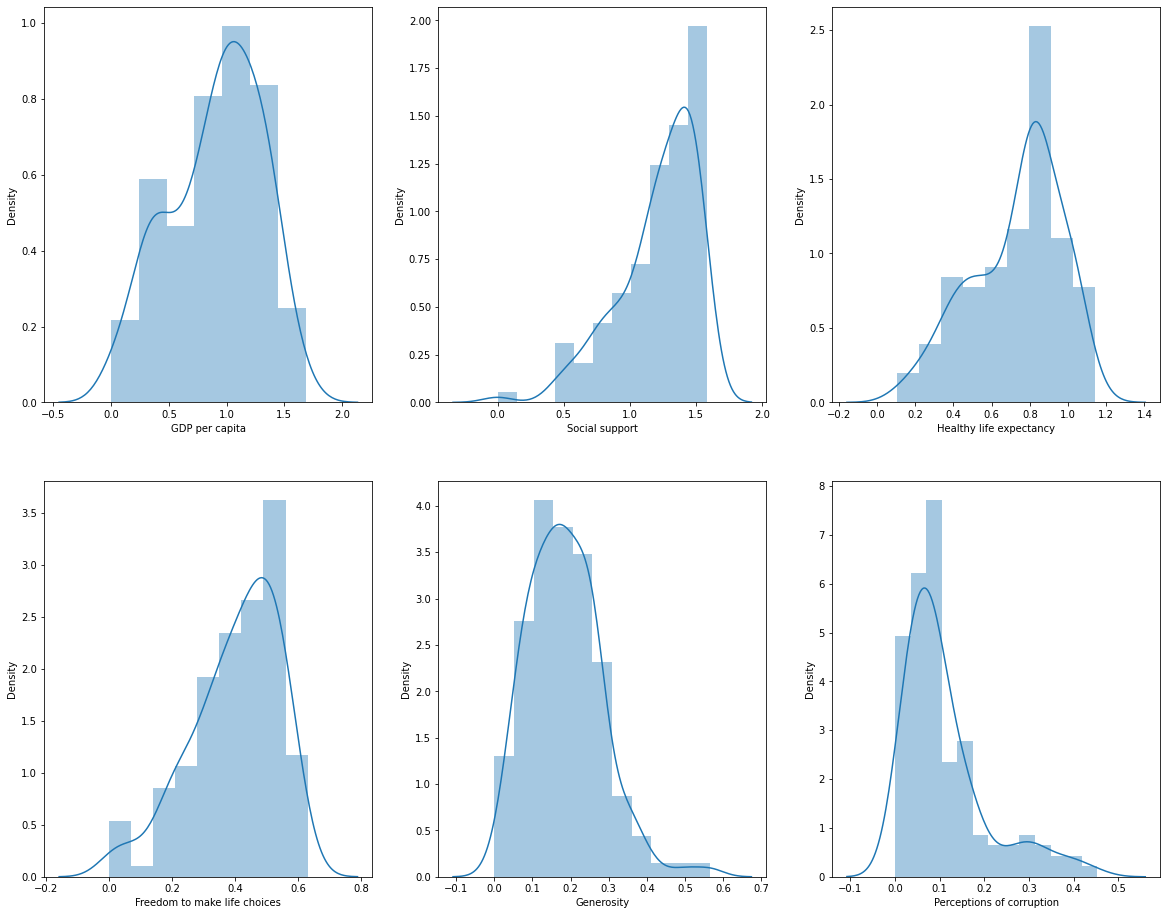

In [28]:

fig, axes = plt.subplots(2, 3, figsize=(20,16))
sns.distplot(df['GDP per capita'], hist = True, kde = True, ax = axes[0,0])
sns.distplot(df['Social support'], hist = True, kde = True, ax = axes[0,1])
sns.distplot(df['Healthy life expectancy'], hist = True, kde = True, ax = axes[0,2])
sns.distplot(df['Freedom to make life choices'], hist = True, kde = True, ax = axes[1,0])
sns.distplot(df['Generosity'], hist = True, kde = True, ax = axes[1,1])
sns.distplot(df['Perceptions of corruption'], hist = True, kde = True, ax = axes[1,2])
plt.show()

In [29]:
df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.805963,0.784659,0.801338,0.542527,0.062037,0.403298
GDP per capita,0.805963,1.000000,0.791779,0.853389,0.389680,-0.097278,0.305887
Social support,0.784659,0.791779,1.000000,0.752237,0.438826,-0.032101,0.214007
Healthy life expectancy,0.801338,0.853389,0.752237,1.000000,0.404311,-0.075739,0.311384
Freedom to make life choices,0.542527,0.389680,0.438826,0.404311,1.000000,0.266795,0.452408
Generosity,0.062037,-0.097278,-0.032101,-0.075739,0.266795,1.000000,0.338353
Perceptions of corruption,0.403298,0.305887,0.214007,0.311384,0.452408,0.338353,1.000000


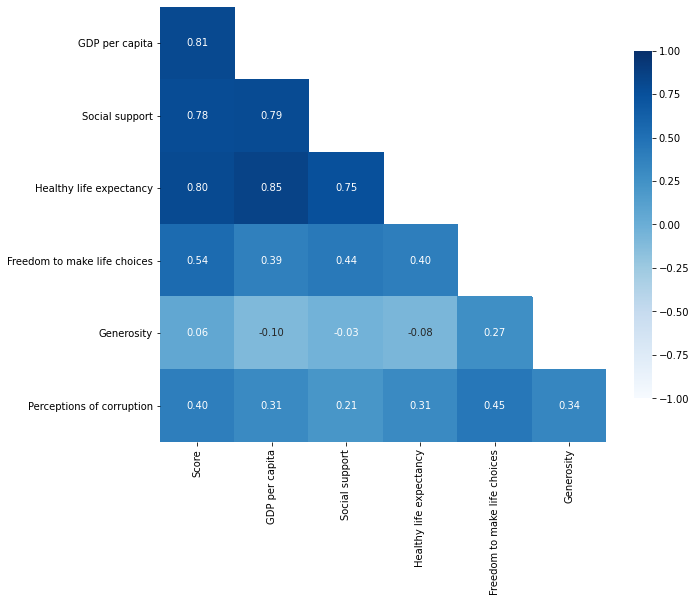

In [30]:
def corr_graph(data):
    data_corr = data.corr()
    fig, ax = plt.subplots(figsize = (10,8))
    mask = np.triu(np.ones_like(data_corr, dtype = np.bool))

    mask = mask[1:,:-1]
    corr = data_corr.iloc[1:,:-1].copy()

    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    plt.yticks(rotation = 0)
    plt.show()

corr_graph(df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

##3.'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'incomeLevel', 'latitude(1에서 범주화된)' 변수를 이용해 교호작용을 고려한 회귀분석을 수행하고 결과를 해석하시오. 

In [38]:
df_reg = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]
df_dummies = pd.get_dummies(df[['incomeLevel', 'latitude_x']])
df_reg = pd.concat([df_reg, df_dummies], axis = 1)

y = df['Score']

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(df_reg)   ## 변수에 교호작용을 추가해줌

array([[1.383, 1.573, 0.996, ..., 0.   , 0.   , 0.   ],
       [1.488, 1.582, 1.028, ..., 0.   , 0.   , 0.   ],
       [1.396, 1.522, 0.999, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.35 , 0.517, 0.361, ..., 0.   , 0.   , 0.   ],
       [0.026, 0.   , 0.105, ..., 0.   , 0.   , 0.   ],
       [0.306, 0.575, 0.295, ..., 0.   , 0.   , 0.   ]])

In [41]:
df_reg.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'incomeLevel_High income',
       'incomeLevel_Low income', 'incomeLevel_Lower middle income',
       'incomeLevel_Upper middle income', 'latitude_x_저위도지역',
       'latitude_x_중위도지역'],
      dtype='object')

In [40]:
### 후진제거법은 p-value가 가장 큰 것부터 없애나간다
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr = LinearRegression()
## n_features_to_select : 최종적으로 몇개의 변수를 골라낼 것인가, step = 한 번에 몇 개의 변수를 골라낼 것인가

## 1개씩 없애가면서 살펴보기
for i in range(len(df_reg.columns),0,-1):
  rfe = RFE(lr, n_features_to_select = i, step = 1)
  model = rfe.fit(df_reg, y)
  filtered_list = [i for (i, v) in zip(df_reg.columns, model.support_) if v]
  ## R2 확인용
  X = df_reg[filtered_list]
  X = sm.add_constant(X)
  model = sm.OLS(y,X)
  results = model.fit()
  print("선택된 변수:", filtered_list)
  print(results.summary())
  print("=====================\n")

선택된 변수: ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'incomeLevel_High income', 'incomeLevel_Low income', 'incomeLevel_Lower middle income', 'incomeLevel_Upper middle income', 'latitude_x_저위도지역', 'latitude_x_중위도지역']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 06 Aug 2021   Prob (F-statistic):           2.35e-38
Time:                        22:21:28   Log-Likelihood:                -97.782
No. Observations:                 134   AIC:                             215.6
Df Residuals:                     124   BIC:                             244.5
Df Model:                           9                                         
Covarian